<center><img src='./Figs/cs-logo.png' width=200></center>



<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Sujet 1 : Colorisation de l'Empire Russe </center>
<hr style=" border:none; height:3px;">
</h1>


 Ce TP est inspiré du TP d' Alexei Alyosha Efros, un grand chercheur en vision et en informatique graphique et proposé dans le cadre de son cours *Intro to Computer Vision and Computational Photography*

# Un peu d'histoire

En 1907, Sergei Mikhailovich Prokudin-Gorskii (1863-1944), convaincu que la photographie couleur est la voie de l'avenir, demande et obtient une permission du Tzar pour traverser l'empire russe et prendre des photographies couleurs de tout ce qu'il voyait. Il a réellement tout photographié: 
+ des gens,
+ des édifices,
+ des paysages,
+ des chemins de fer,
+ des ponts... 


L'objectif est de produire des milliers de photographies couleurs. A cette époque, la photographie couleur n'existe pas encore. Son idée est toute simple: **enregistrer sur des lames de verre trois expositions de chaque scène en utilisant un filtre rouge, vert et bleu pour chacune d'elles**.

<center><img src='./Images/cathedral.jpeg' width=200></center>

A l'époque, les imprimante n'existent pas et il n'y a aucun moyen d'imprimer ces photos couleurs! Il s'imagine des projecteurs spéciaux installés dans des locaux de classe au travers de tout l'empire où les enfants pourront en apprendre plus sur leur vaste pays. Malheureusement, ses plans ne se sont jamais réalisés. Il quitte la Russie en 1918, juste après la révolution. 

Les négatifs RGB ("Red-Green-Blue", ou Rouge-Bleu-Vert) capturant les dernières années de l'empire russe ont survécu et furent achetées en 1948 par la Librairie du Congrès aux États-Unis. Celle-ci a récemment, en 2004, numérisé ces négatifs et les ont rendus accessibles sur Internet. Il s'agit de la [collection Prokudin-Gorskii](https://www.loc.gov/pictures/collection/prok/).

L'explication de comment les images ont été colorisées est disponible [ici](https://www.loc.gov/exhibits/empire/making.html).



# Objectif de ce TP

Le but de ce TP est de générer automatiquement une image couleur à partir des plaques de verre numérisées de la collection Prokudin-Gorskii, et ce avec le minimum d'artefacts visuels possible.

Pour cela, il vous faudra extraire les trois canaux de couleurs, les agencer un par-dessus l'autre, et les aligner pour que leur combinaison forme une image couleur RGB (synthèse additive). Un simple modèle de translation (en x, y) est suffisant pour un aligner les images correctement. Par contre, puisque les plaques de verre sont de très grandes tailles, la procédure d'alignement doit être relativement rapide et efficace.

## Quelques indications.

Quelques-unes des images de plaques de verre numérisées (basse et haute résolution) sont disponibles dans le répertoire Data (l'ordre des filtres de haut en bas est BGR et non RGB !).

<center><img src='./Images/3-rgb.jpeg' width=200></center>


L'objectif est de concevoir un  programme qui prendra une image de la plaque de verre en entrée et qui retournera une image en couleur en sortie. 
Le programme doit
+ diviser l'image originale en trois images de même dimension.
+ Ensuite, il doit aligner les deuxième et troisième images (G et R) à la première (B).
+ Pour chaque image,il faudra ensuite calculer le vecteur de déplacement $(x , y)$ nécessaire à son alignement avec la première.



### Etape 0 : prise en main des images

Ecrire une fonction permettant de charger et d'afficher une image de la collection (fournie dans le répertoire [Data](./Data)).

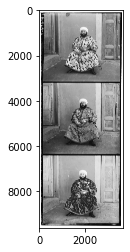

In [13]:
# TO COMPLETE


### Etape 1 : Division  de l'image originale
Ecrire ici le code vous permettant de division l'image originale en trois images de même dimension.



In [5]:
# TO COMPLETE

A partir de cette division, générer alors l'image couleur résultant des trois canaux obtenus. 

In [6]:
# TO COMPLETE

Qu'observez-vous ?

### Etape 2 : Alignement des images


Ici, il n'est pas possible de simplement superposer naïvement les canaux puisqu'ils sont très légèrement différents les uns des autres. Ces différences ont pu apparaître à cause de sujets en mouvement ou de légers changements dans le mouvement de la caméra. Vous devez donc trouver un moyen d'aligner ces canaux en utilisant les informations contenues dans les canaux (les pixels).

#### Approche exhaustive

La façon la plus facile d'aligner les images est d'effectuer une recherche exhaustive sur une fenêtre de **déplacements possibles** (par exemple $[-15:15]$ pixels) et d'évaluer chacun de ceux-ci en utilisant une métrique de comparaison. Il suffit ensuite de prendre le déplacement avec le meilleur score.


Plusieurs mesures permettant d'évaluer si les images sont bien alignées. La plus simple est la somme des différences au carré.

$SSD(\vec{x}, \vec{y}) = \sum_{i}\sum_{j}(\vec{x}_{i,j} - \vec{y}_{i,j})^2$

Il est aussi possible d'utiliser la corrélation croisée normalisée (CCN), qui est tout simplement un produit scalaire entre deux vecteurs normalisés :

$NCC(\vec{x}, \vec{y}) = \langle\frac{\vec{x}}{||\vec{x}||}, \frac{\vec{y}}{||\vec{y}||}\rangle$

Ecrire le code permettant de choisir, par cette approche, le meilleur dépacement entre le canal B et le canal R et entre le canal B et le canal G pour aligner ensuite les images et construire l'image couleur résultant de cet alignement.

**Indication** : Les bords de l'image, mal alignés, peuvent fausser le résultat de cette fonction de score. Vous pouvez par exemple ignorer un pourcentage des bords (marges) de chaque côté de l'image dans le calcul de ces métriques.  


In [ ]:
# TO COMPLETE

Apppliquer votre code aux différentes images de faible résolution (.jpeg) fournies en affichant pour chacune le déplacement retenu.



<center><img src='./Images/cathedrale.png' width=700></center>




In [ ]:
# TO COMPLETE

### Approche à base d'une pyramide d'images

La recherche exhaustive de l'étape précédente deviendra trop lourde si le déplacement de pixels est trop grand (ce qui sera le cas pour les analyses de la plaque de verre à haute résolution). 

Dans ce cas, vous devrez implémenter une procédure de recherche plus rapide basée sur une [pyramide d'images](https://fr.wikipedia.org/wiki/Pyramide_(traitement_d%27image)). Une pyramide d'images, comme nous l'avons vu en cours, représente l'image à plusieurs échelles. Généralement, on obtient une pyramide en divisant l'échelle d'un facteur de 2 à chaque étape. On obtient donc une série d'images, qui ne sont que l'image originale à l'échelle 1, 1/2, 1/4, etc.

L'alignement d'images se fait de manière séquentielle à partir de l'échelle la plus petite (1/4 par exemple) jusqu'à la plus grande (1) en mettant à jour l'estimé de translation au fur et à mesure. Cela est très facile à implémenter en ajoutant des appels récursifs à votre implémentation initiale à une seule échelle.

Par exemple, une procédure pourrait être :

+ Réduire l'échelle de l'image par un facteur.
+ Recherche des déplacements possibles dans une fenêtre de recherche.
+ Calculer le score de chaque déplacement des canaux rouge et vert avec le canal de couleur bleue d'origine en utilisant la corrélation croisée normalisée
+ Mise à jour de l'image avec le déplacement calculé, multiplié par le facteur d'échelle.
+ Appel récursif de la fonction, en divisant par deux la fenêtre de recherche et le facteur d'échelle.

Mettre en oeuvre cette approche et appliquer là aux différentes images de votre base.

In [ ]:
# TO COMPLETE

Qu'observez-vous pour l'image [emir.tiff](./Data/emir.tiff) ? 

In [14]:
# TO COMPLETE

Vous devriez avoir quelque chose comme :


<center><img src='./Images/emir_bad.jpeg' width=300></center>

D'ou vient le problème à votre avis ?

In [15]:
# TO COMPLETE

### Utilisation des contours

Une idée pour améliorer l'alignement est de se baser sur les contours. Il s'agit donc d'extraire les contours (forts) de ces différentes images et de construire l'alignement à partir de ces images de contours. Vous pouvez essayer ici plusieurs approches pour extraire les contours (Sobel, Canny...).


<center><img src='./Images/emir_sobel.jpeg' width=300></center>


Ecrire le code permettant de faire cet alignement à l'aide des contours et tester sur plusieurs des images de votre base.

In [16]:
# TO COMPLETE

### Etape 3 : amélioration de la qualité visuelle de l'image

Il s'agit ici d'améliorer la qualité visuelle de l'image par traitement d'images.
Des traitements possibles sont par exemple :
 + Le recadrage de bordures
 + L'amélioration du contraste par égalisation d'histogramme (en couleur ou en niveaux de gris)
 + et toute autre traitement que vous jugerez utile
 
 Ecrire ici le code permettant d'améliorer la qualité visuelle de l'image couleur ainsi créée.

In [ ]:
# TO COMPLETE
